# <span style="color:darkblue"> Lecture 11: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [4]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [5]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Treatment
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Treatment
4,17.0,8,302,140,3449,10.5,F-1689824,Treatment
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment
394,44.0,4,97,52,2130,24.6,V-1694114,Control
395,32.0,4,135,84,2295,11.6,D-1694125,Control
396,28.0,4,120,79,2625,18.6,F-1694136,Control


<font size = "5">

Compute frequencies by status

In [8]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Proportion",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,226
Treatment,172


col_0,Proportion
status,
Control,0.567839
Treatment,0.432161


<font size = "5">

Query with string conditions

In [10]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [11]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,172.000000,172.000000,172.000000,172.000000,172.000000
mean,22.510465,5.610465,202.482558,3035.255814,15.416860
std,7.117108,1.694334,104.899031,820.361576,2.757384
min,10.000000,4.000000,68.000000,1613.000000,8.000000
25%,17.000000,4.000000,109.500000,2294.750000,13.950000
50%,21.000000,6.000000,156.000000,2909.500000,15.500000
75%,27.000000,8.000000,302.000000,3701.000000,17.000000
max,44.300000,8.000000,455.000000,4952.000000,23.700000


,mpg,cylinders,displacement,weight,acceleration
count,226.000000,226.000000,226.000000,226.000000,226.000000
mean,24.278761,5.336283,186.535398,2921.084071,15.683186
std,8.242297,1.700252,103.487588,864.998460,2.758467
min,9.000000,3.000000,70.000000,1649.000000,8.500000
25%,18.000000,4.000000,98.000000,2165.750000,13.825000
50%,23.900000,4.000000,140.000000,2705.500000,15.500000
75%,31.000000,6.000000,258.000000,3455.500000,17.475000
max,46.600000,8.000000,455.000000,5140.000000,24.800000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [23]:
def fn_engine(cylinder):
    if (cylinder == 8): 
        status = "V-8 engine"
    else: 
        status = "Not V-8"
    return(status) 

carfeatures["Engine"] = carfeatures["cylinders"].apply(fn_engine)


<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [46]:
x_bar_mpg = carfeatures['mpg'].mean()
med_mpg = carfeatures['mpg'].median()

subset = carfeatures.query('(mpg<=@x_bar_mpg) & (mpg<@med_mpg) & ( cylinders==4 | cylinders==8)')
subset


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,Engine
0,18.0,8,307,130,3504,12.0,C-1689780,Control,V-8 engine
1,15.0,8,350,165,3693,11.5,B-1689791,Treatment,V-8 engine
2,18.0,8,318,150,3436,11.0,P-1689802,Control,V-8 engine
3,16.0,8,304,150,3433,12.0,A-1689813,Treatment,V-8 engine
4,17.0,8,302,140,3449,10.5,F-1689824,Treatment,V-8 engine
...,...,...,...,...,...,...,...,...,...
288,18.2,8,318,135,3830,15.2,D-1692948,Treatment,V-8 engine
289,16.9,8,350,155,4360,14.9,B-1692959,Control,V-8 engine
290,15.5,8,351,142,4054,14.3,F-1692970,Control,V-8 engine
291,19.2,8,267,125,3605,15.0,C-1692981,Control,V-8 engine


<font size = "5">

(c) Use sorting + ".iloc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [61]:
subset_sorted = subset.sort_values(by="mpg",ascending=True)
lower_subset=subset_sorted.iloc[:10,:]
lower_subset

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,Engine
28,9.0,8,304,193,4732,18.5,H-1690088,Control,V-8 engine
25,10.0,8,360,215,4615,14.0,F-1690055,Control,V-8 engine
26,10.0,8,307,200,4376,15.0,C-1690066,Treatment,V-8 engine
27,11.0,8,318,210,4382,13.5,D-1690077,Control,V-8 engine
124,11.0,8,350,180,3664,11.0,O-1691144,Control,V-8 engine
67,11.0,8,429,208,4633,11.0,M-1690517,Control,V-8 engine
103,11.0,8,400,150,4997,14.0,C-1690913,Control,V-8 engine
42,12.0,8,383,180,4955,11.5,D-1690242,Control,V-8 engine
104,12.0,8,400,167,4906,12.5,F-1690924,Control,V-8 engine
106,12.0,8,350,180,4499,12.5,O-1690946,Control,V-8 engine


<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [137]:

status = ["treatment","control"]
prop = [0.7,0.3]
size = len(carfeatures)

carfeatures["new status"]=np.random.choice(status, size=size,p=prop)

Treatment = carfeatures.query("`new status`=='treatment'")
Control = carfeatures.query("`new status`=='control'")


<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [142]:
def f(x,m,b):
    y = (x**2)*m + b
    return y

x_bar = carfeatures["acceleration"].mean()
low = carfeatures["acceleration"].min()

carfeatures['y']=f(carfeatures['acceleration'],x_bar,low)
    


<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

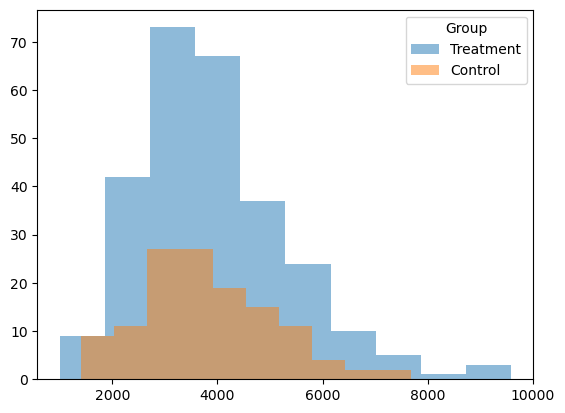

In [143]:
Treatment = carfeatures.query("`new status`=='treatment'")
Control = carfeatures.query("`new status`=='control'")

plt.hist(x=Treatment['y'], alpha=0.5)
plt.hist(x=Control["y"], alpha=0.5)
plt.legend(labels = ["Treatment","Control"], title="Group")

plt.show()
